# MNIST (Modified National Institute of Standards and Technology)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST stands for Modified National Institute of Standards and Technology, which is a dataset of handwritten digits used for training and testing image processing systems.


The MNIST dataset is a collection of 70,000 handwritten digits (0-9) images, with 60,000 images for training and 10,000 images for testing. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding digit class. The MNIST dataset is commonly used as a benchmark dataset for image classification tasks in machine learning and computer vision.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

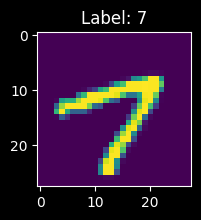

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN


In [20]:
cnn = Sequential(
    layers=[
        Input(shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(10),
        Softmax(),
    ],
    name="cnn",
)

In [21]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <ReLU name=re_lu_3, built=True>,
 <Dense name=dense_3, built=True>,
 <Softmax name=softmax_1, built=True>]

In [22]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

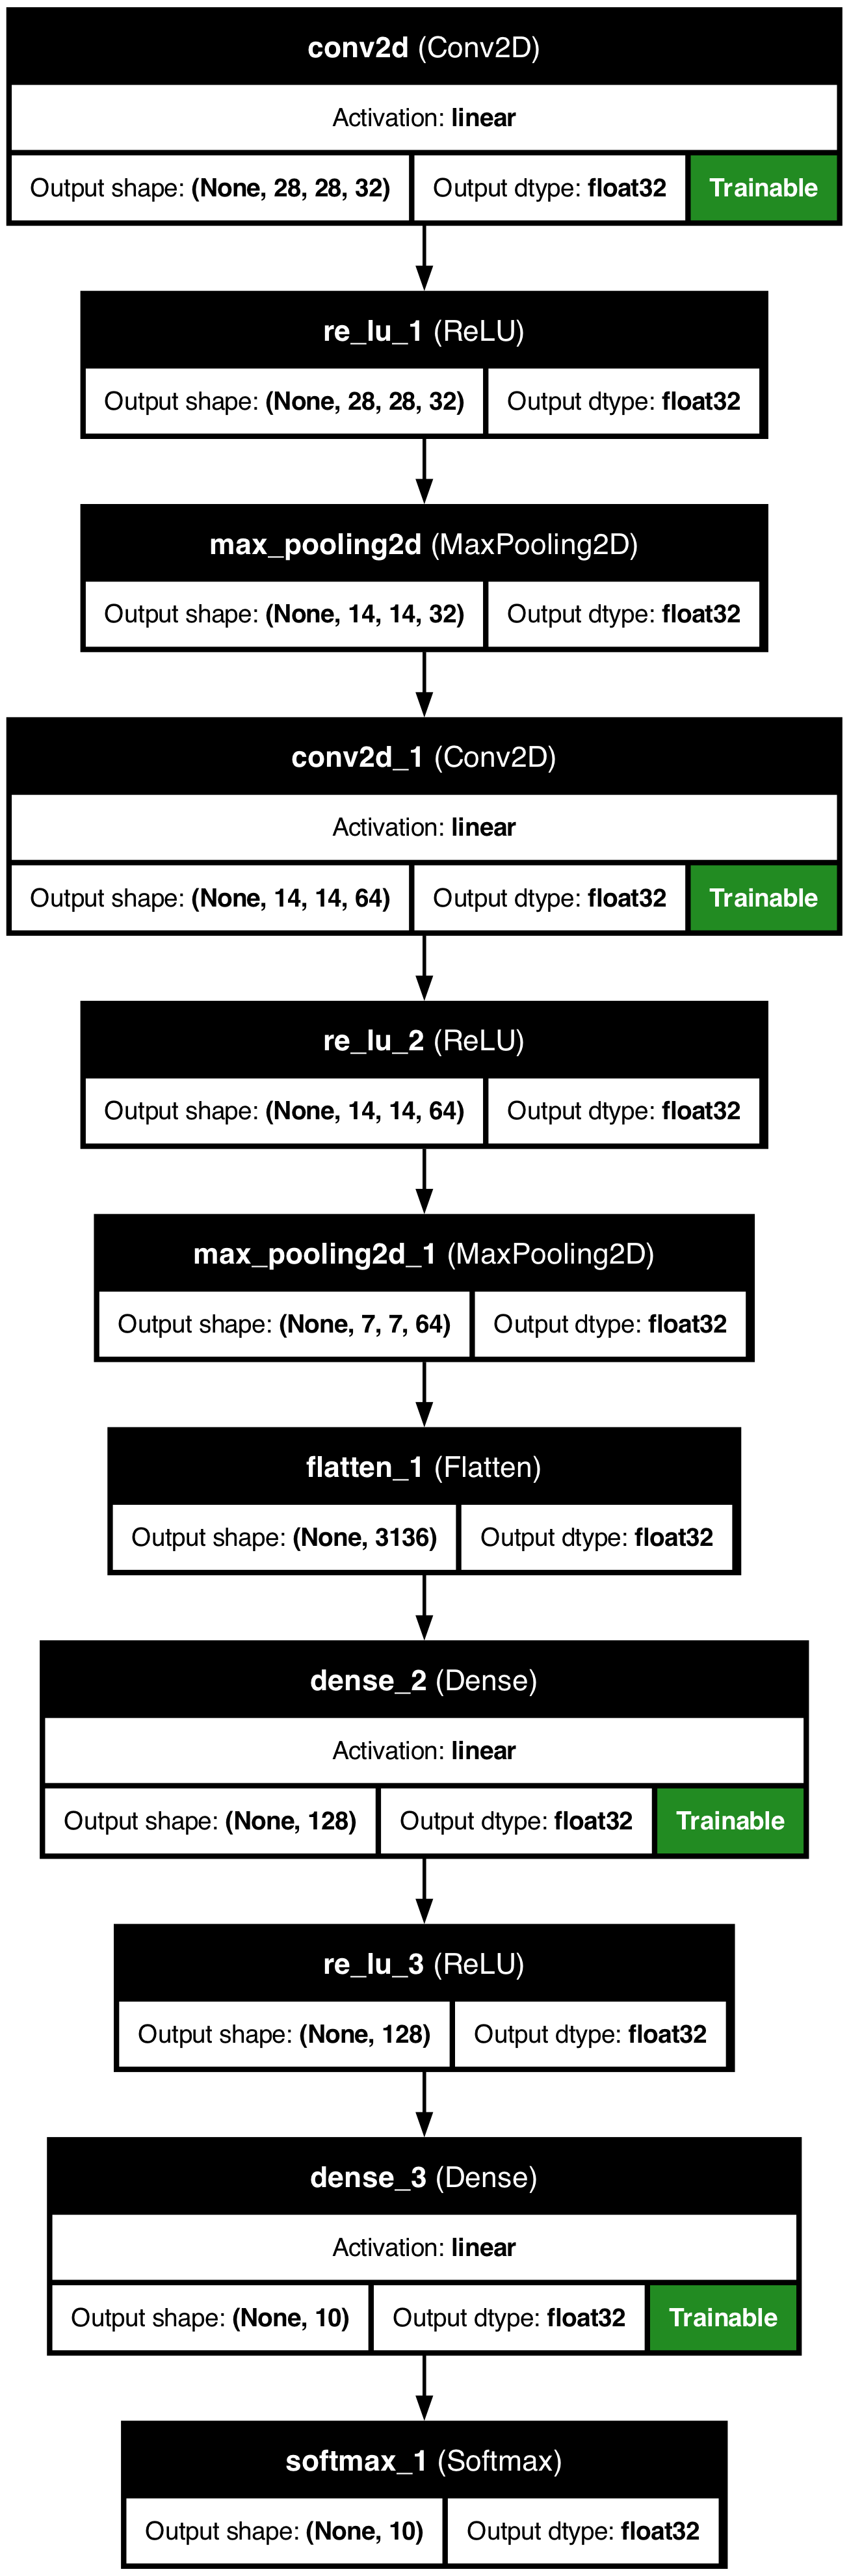

In [24]:
plot_model(
    cnn,
    to_file="../Images/mnist_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [25]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/mnist_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/mnist_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/mnist_cnn_logs"

cnn_csvlogger_callback = CSVLogger("../Logs/mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 0.4077 - sparse_categorical_accuracy: 0.8748 - val_loss: 0.0689 - val_sparse_categorical_accuracy: 0.9797
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0491 - val_sparse_categorical_accuracy: 0.9848
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.0357 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0386 - val_sparse_categorical_accuracy: 0.9890
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9883
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - loss: 0.0172 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0441 - val_sparse_categorical_accuracy: 0.9875


In [26]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.06186277158558369
Validation loss: 0.04798521772027016
0.980900 Training accuracy with a standard deviation of 0.017845
0.985867 Validation accuracy with a standard deviation of 0.003366


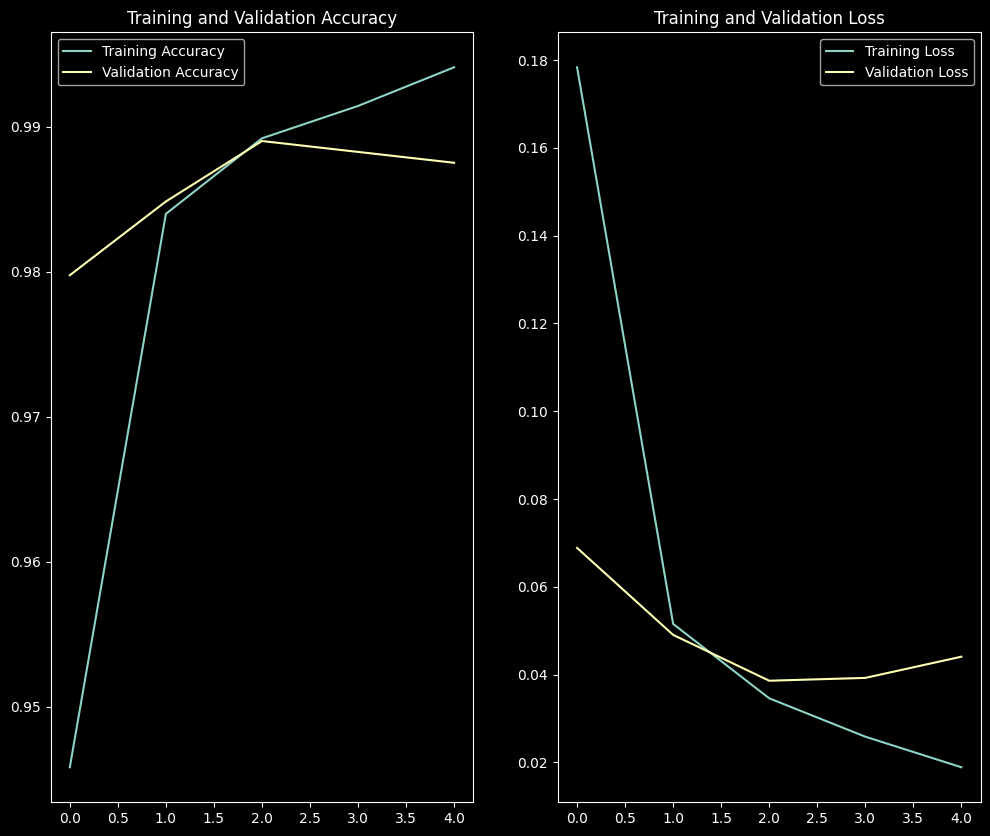

In [27]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/mnist_cnn_acc_loss.png", bbox_inches="tight")

In [28]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0434 - sparse_categorical_accuracy: 0.9856
Test loss: 0.035291530191898346
Test accuracy: 0.988099992275238


In [29]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
